In [1]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [5]:
df = pd.read_csv("D:\\MLFlow\\Student Performance Indicator Project\\notebook\\data\\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y Variables

In [7]:
X= df.drop(columns=['math_score'], axis =1)
y = df['math_score']

In [8]:
print('Categories in gender variable:  ', end='')
print(df['gender'].unique())

print('Categories in race/ethnicity variable:  ', end='')
print(df['race_ethnicity'].unique())

print('Categories in parental level of education variable:  ', end='')
print(df['parental_level_of_education'].unique())

print('Categories in lunch variable:  ', end='')
print(df['lunch'].unique())

print('Categories in test preparation course variable:  ', end='')
print(df['test_preparation_course'].unique())



Categories in gender variable:  ['female' 'male']
Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [9]:
## Creating Column Transformer wit 3 types of transformer

num_features = X.select_dtypes(exclude='object').columns # all numerical features
cat_features = X.select_dtypes(include='object').columns  # all categorical features


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Column Transformer is responsible for tranforming the columns or data

In [11]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Creating an Evaluation Function to display all metrics

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mae, mse, r2

In [26]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "KNN" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "AdaBoost" : AdaBoostRegressor(),
    "SVM" : SVR(),
    "XGBoost" : XGBRegressor(),
    "CatBoost" : CatBoostRegressor(verbose=0)
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_r2, model_train_mse = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_r2, model_test_mse = evaluate_model(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Train MAE: ", model_train_mae)
    print("Train R2: ", model_train_r2)
    print("Train MSe: ", model_train_mse)

    print("Test MAE: ", model_test_mae)
    print("Test R2: ", model_test_r2)
    print("Test MSe: ", model_test_mse)
    r2_list.append(model_test_r2)
    
    
    

Linear Regression
Train MAE:  4.267109375
Train R2:  28.348541259765625
Train MSe:  0.8742565651513869
Test MAE:  4.2158203125
Test R2:  29.116678771972655
Test MSe:  0.8803449074540941
Ridge
Train MAE:  4.264987823725981
Train R2:  28.33778823308244
Train MSe:  0.8743042615212909
Test MAE:  4.2111006880142625
Test R2:  29.056272192348324
Test MSe:  0.8805931485028737
Lasso
Train MAE:  5.206302661246526
Train R2:  43.47840400585579
Train MSe:  0.8071462015863456
Test MAE:  5.157881810347763
Test R2:  42.5064168384116
Test MSe:  0.8253197323627853
KNN
Train MAE:  4.516749999999999
Train R2:  32.57765
Train MSe:  0.8554978341651085
Test MAE:  5.621
Test R2:  52.6066
Test MSe:  0.7838129945787431
Decision Tree
Train MAE:  0.01875
Train R2:  0.078125
Train MSe:  0.9996534669718089
Test MAE:  6.185
Test R2:  61.295
Test MSe:  0.7481079846008686
Random Forest
Train MAE:  1.83079375
Train R2:  5.206542292056406
Train MSe:  0.9769057425040446
Test MAE:  4.666819642857143
Test R2:  35.940958180

### Results

In [27]:
df_results=pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R2 Score']).sort_values(by=["R2 Score"], ascending = False)
print(df_results)

               Model   R2 Score
7                SVM  66.042005
4      Decision Tree  61.295000
3                KNN  52.606600
2              Lasso  42.506417
8            XGBoost  41.903708
9           CatBoost  36.103658
5      Random Forest  35.940958
6           AdaBoost  35.703501
0  Linear Regression  29.116679
1              Ridge  29.056272


## SVM Model

In [28]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.7286001513223705


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

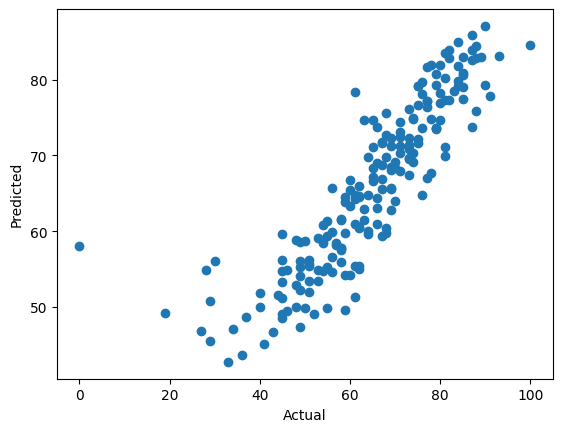

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

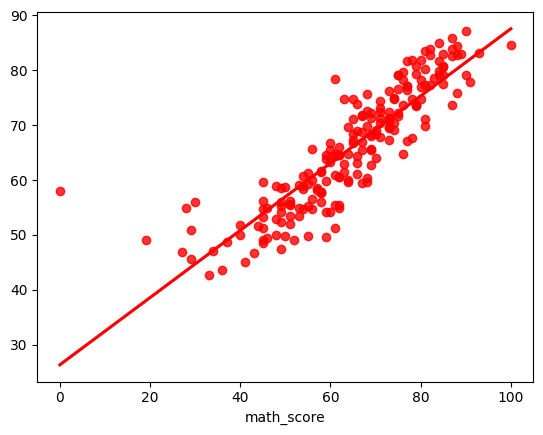

In [30]:
sns.regplot(x=y_test, y=y_pred, ci = None, color='red')

## Difference between actual and predicted values

In [32]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "Difference": y_test - y_pred})
print(pred_df)

     Actual  Predicted  Difference
521      91  77.894502   13.105498
737      53  59.156773   -6.156773
740      80  76.887118    3.112882
660      74  74.782669   -0.782669
411      84  84.960341   -0.960341
..      ...        ...         ...
408      52  49.118968    2.881032
332      62  60.584607    1.415393
208      74  69.166504    4.833496
613      65  68.343699   -3.343699
78       61  64.320307   -3.320307

[200 rows x 3 columns]
